In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2ghgemission/co2_greenHouseGas_Emissions.csv


# About the Dataset

**About Dataset**
This dataset contains information about the CO2 emissions and greenhouse gas emissions of various countries, along with their respective continents. The data is structured in a tabular format with each row representing a country and its associated attributes.

Data Fields:

Region: The name of the country or region.

CO2 Emissions (Mt): The amount of carbon dioxide emissions measured in megatons (million metric tons).

Greenhouse Gas Emissions (Mt): The total greenhouse gas emissions measured in megatons (million metric tons).

Continent: The continent where the country or region is located.

Potential Applications:

Environmental Research: Researchers can use this dataset to study the impact of CO2 and greenhouse gas - emissions on global warming and climate change.

Policy Making: Governments and international organizations can utilize this data to develop and implement policies aimed at reducing emissions.

Educational Purposes: This dataset can serve as a resource for students and educators in courses related to environmental science, geography, and international studies.

Sources: https://www.kaggle.com/datasets/shahriarkabir/co2-and-greenhouse-gas-emissions-by-region/data

# Import Neccessary modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file

In [5]:
emissions = pd.read_csv("/kaggle/input/co2ghgemission/co2_greenHouseGas_Emissions.csv")

# Some EDA (Exploratory Data Analysis) on the dataset

In [6]:
emissions.head()

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
0,Afghanistan,5.68,98.9,Asia
1,Albania,4.49,10.1,Europe
2,Algeria,177.08,218.9,Africa
3,Angola,20.19,79.7,Africa
4,Anguilla,0.02,NaN,North America


In [7]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Region                         204 non-null    object
 1   CO2 Emissions (Mt)             204 non-null    object
 2   Greenhouse Gas Emissions (Mt)  179 non-null    object
 3   Continent                      204 non-null    object
dtypes: object(4)
memory usage: 6.5+ KB


In [9]:
emissions.isnull().sum()

Region                            0
CO2 Emissions (Mt)                0
Greenhouse Gas Emissions (Mt)    25
Continent                         0
dtype: int64

In [10]:
#convert columns Co2 emission and Co2 emission to numeric columns
emissions.iloc[25]
#some rows like brazil GHG(MT) is in MIllions so we can't convert it float 


Region                                  Brazil
CO2 Emissions (Mt)                      466.77
Greenhouse Gas Emissions (Mt)             1.0M
Continent                        South America
Name: 25, dtype: object

In [13]:
#convert the co2 and GHG columns to numbers and also correct replace the K and M in some rows
def convert_to_numeric(value):
    if isinstance(value, str):  # Check if the value is a string
        if 'K' in value:
            return float(value.replace('K', '')) * 1_000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        else:
            return pd.to_numeric(value, errors='coerce')
    else:
        return value  # Return the value as is if it's already a number
# Apply the function to the column
emissions['CO2 Emissions (Mt)'] = emissions['CO2 Emissions (Mt)'].apply(convert_to_numeric)
emissions['Greenhouse Gas Emissions (Mt)'] = emissions['Greenhouse Gas Emissions (Mt)'].apply(convert_to_numeric)

In [14]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         204 non-null    object 
 1   CO2 Emissions (Mt)             204 non-null    float64
 2   Greenhouse Gas Emissions (Mt)  179 non-null    float64
 3   Continent                      204 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.5+ KB


In [15]:
emissions.describe()

,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt)
count,204.000000,1.790000e+02
mean,183.228088,1.481890e+05
std,978.063967,1.075987e+06
min,0.020000,1.200000e+00
25%,2.095000,1.820000e+01
50%,12.040000,5.330000e+01
75%,61.650000,2.256000e+02
max,12670.000000,1.240000e+07


In [17]:
#from the table i notice the missing columns in GHG have a low Co2 and also lower Co2 would mean 
#low GHG emission too so i decided to use the minimum value to fill in the space
emissions['Greenhouse Gas Emissions (Mt)'] = emissions['Greenhouse Gas Emissions (Mt)'].fillna(emissions['Greenhouse Gas Emissions (Mt)'].min())

In [19]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         204 non-null    object 
 1   CO2 Emissions (Mt)             204 non-null    float64
 2   Greenhouse Gas Emissions (Mt)  204 non-null    float64
 3   Continent                      204 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.5+ KB


In [22]:
co2_ghg = emissions[['CO2 Emissions (Mt)', 'Greenhouse Gas Emissions (Mt)']].sum()
co2, ghg = co2_ghg
co2, ghg

(37378.53, 26525861.8)

In [25]:
cont = emissions.Continent.value_counts()

# Visualization on the dataset

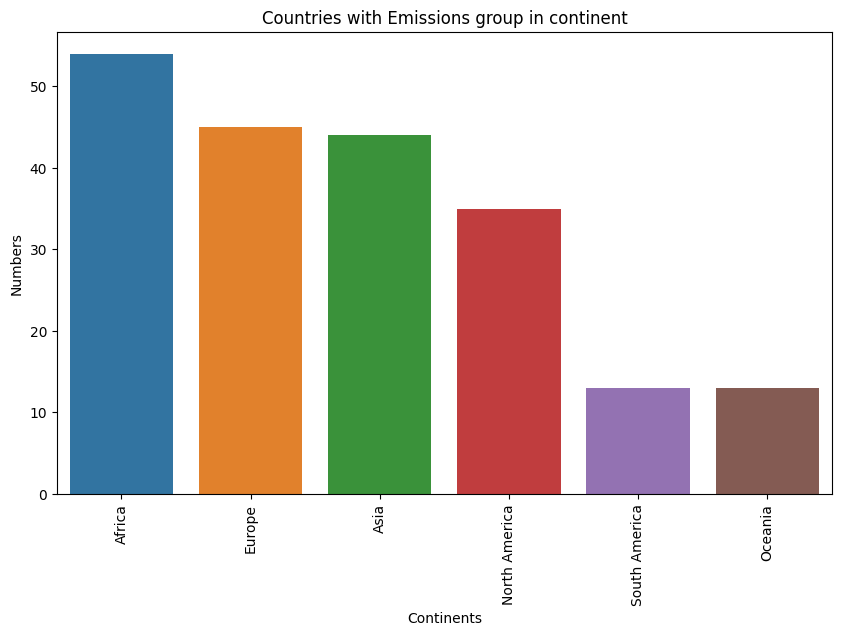

In [26]:
#grouped countries present in the dataset based on continent
plt.figure(figsize=(10, 6))
sns.barplot(x=cont.index, y=cont.values)

plt.title('Countries with Emissions grouped in continent')
plt.xlabel('Continents')
plt.ylabel('Numbers')
plt.xticks(rotation=90)
plt.show()

it can be seen that Africa has the highest country represented on the list

In [49]:
#group and order countries with emissions based on Co2
continent_co2 = emissions.groupby('Continent')[['CO2 Emissions (Mt)', 'Greenhouse Gas Emissions (Mt)']].sum().sort_values(by="Greenhouse Gas Emissions (Mt)", ascending=False)
continent_co2

,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt)
Continent,,
Asia,22110.77,17007124.8
North America,6092.73,6003396.3
Europe,6210.75,2505486.7
South America,1084.65,1001207.6
Africa,1438.76,4640.3
Oceania,440.87,4006.1


As you can see above Asia countries generate more in terms of Co2 and GHG followed by North America and Europe. This might be due to presence of huge companies and machineries that generates heat.
Let's dive deeper and check the top 10

In [52]:
#top 10 countries with the highest emission and 10 countries with the lowest emission
co2 = emissions.sort_values(by='CO2 Emissions (Mt)', ascending=False).head(10)
#top_10_co2 = co2.head(10)

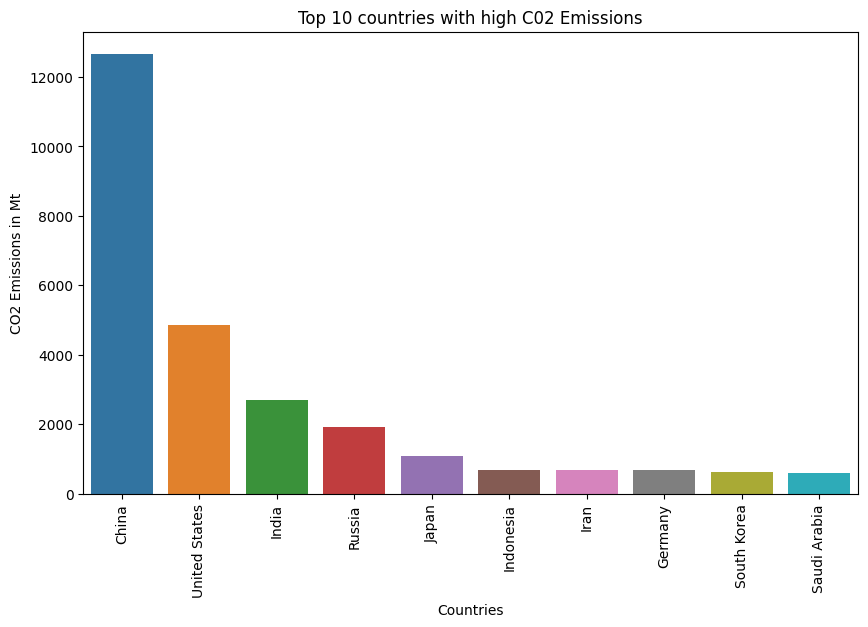

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="CO2 Emissions (Mt)", data=co2)

plt.title('Top 10 countries with high C02 Emissions')
plt.xlabel('Countries')
plt.ylabel('CO2 Emissions in Mt')
plt.xticks(rotation=90)
plt.show()

From our barchart it can be seen that Asia countries cause generate more C02 compare to others with China generating almost as twice as others

In [63]:
ghg = emissions.sort_values(by='Greenhouse Gas Emissions (Mt)', ascending=False).head(10)
ghg

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
39,China,12670.00,12400000.0,Asia
194,United States,4850.00,6000000.0,North America
86,India,2690.00,3400000.0,Asia
151,Russia,1910.00,2500000.0,Europe
95,Japan,1080.00,1200000.0,Asia
25,Brazil,466.77,1000000.0,South America
87,Indonesia,692.24,969.6,Asia
167,Solomon Islands,0.32,940.0,Oceania
197,Vanuatu,0.22,870.0,Oceania
88,Iran,686.42,828.3,Asia


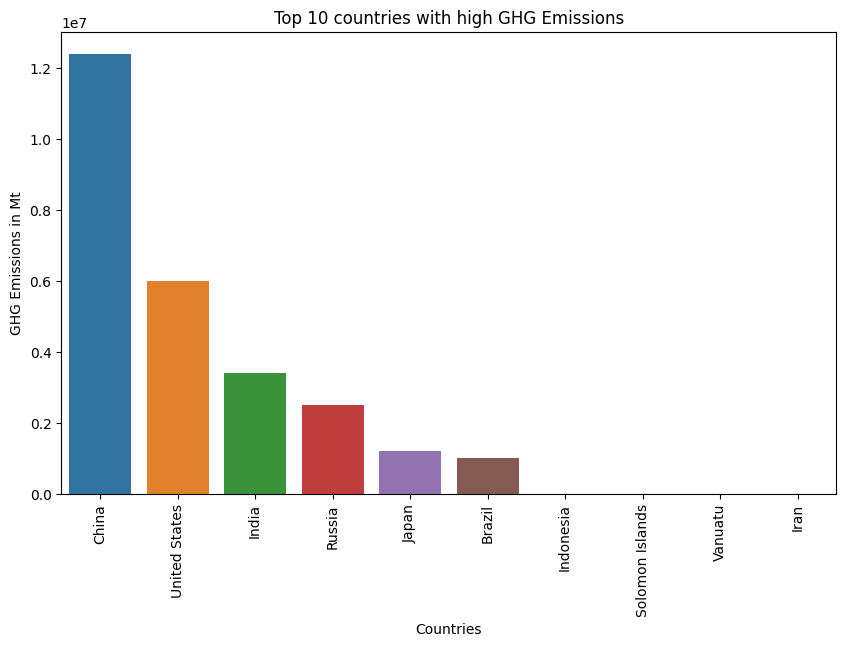

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Greenhouse Gas Emissions (Mt)", data=ghg)

plt.title('Top 10 countries with high GHG Emissions')
plt.xlabel('Countries')
plt.ylabel('GHG Emissions in Mt')
plt.xticks(rotation=90)
plt.show()

In [53]:
co2low = emissions.sort_values(by='CO2 Emissions (Mt)', ascending=True).head(10)
co2low

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
4,Anguilla,0.02,1.2,North America
155,Saint Pierre and Miquelon,0.04,1.2,North America
26,British Virgin Islands,0.06,1.2,North America
99,Kiribati,0.07,110.0,Oceania
52,Dominica,0.07,240.0,North America
156,Saint Vincent and the Grenadines,0.08,370.0,North America
189,Turks and Caicos Islands,0.09,1.2,North America
153,Saint Kitts and Nevis,0.10,370.0,North America
42,Cook Islands,0.11,1.2,Oceania
75,Grenada,0.12,2.4,North America


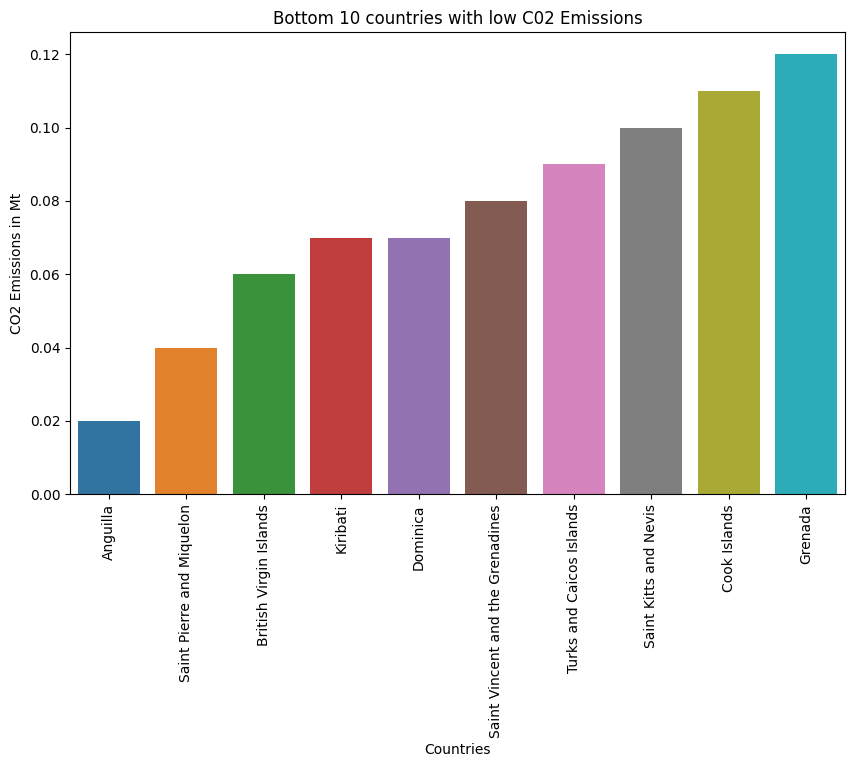

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="CO2 Emissions (Mt)", data=co2low)

plt.title('Bottom 10 countries with low C02 Emissions')
plt.xlabel('Countries')
plt.ylabel('CO2 Emissions in Mt')
plt.xticks(rotation=90)
plt.show()

In [57]:
#Most of the countries are from North America, mind you the bar might look taller but the y-axis label signifies how low it is compared to the top 10

<Axes: >

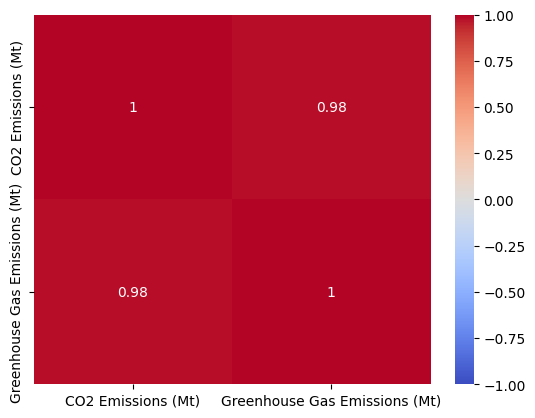

In [58]:
co2_ghgcorr = emissions[['CO2 Emissions (Mt)','Greenhouse Gas Emissions (Mt)']].corr()
sns.heatmap(co2_ghgcorr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

I don't think we would be surprise about the correlation because definitely an increase in Co2 would definitely result in an increase in GHG

# Conclusion

Generally, China, USA, India, Japan and Russia are the top 5 for GHG emissions and also CO2 emission, there should be strategies by UN to mitigate the emission of this gases